In [1]:
import pandas as pd

df = pd.read_csv("earthquakes_subduction.csv")
print(df.head())
print(df['subduction_flag'].value_counts())


   latitude  longitude  depth  mag  year  month  day_of_year  subduction_flag
0    51.582     16.026    5.0  5.4  1999     12          365                0
1    10.398    126.226   47.0  5.4  1999     12          365                1
2    52.868    159.979   53.9  5.0  1999     12          365                0
3    37.269    134.664  371.4  5.6  1999     12          365                0
4     1.851    127.085   91.3  5.0  1999     12          364                1
subduction_flag
0    49345
1    10428
Name: count, dtype: int64


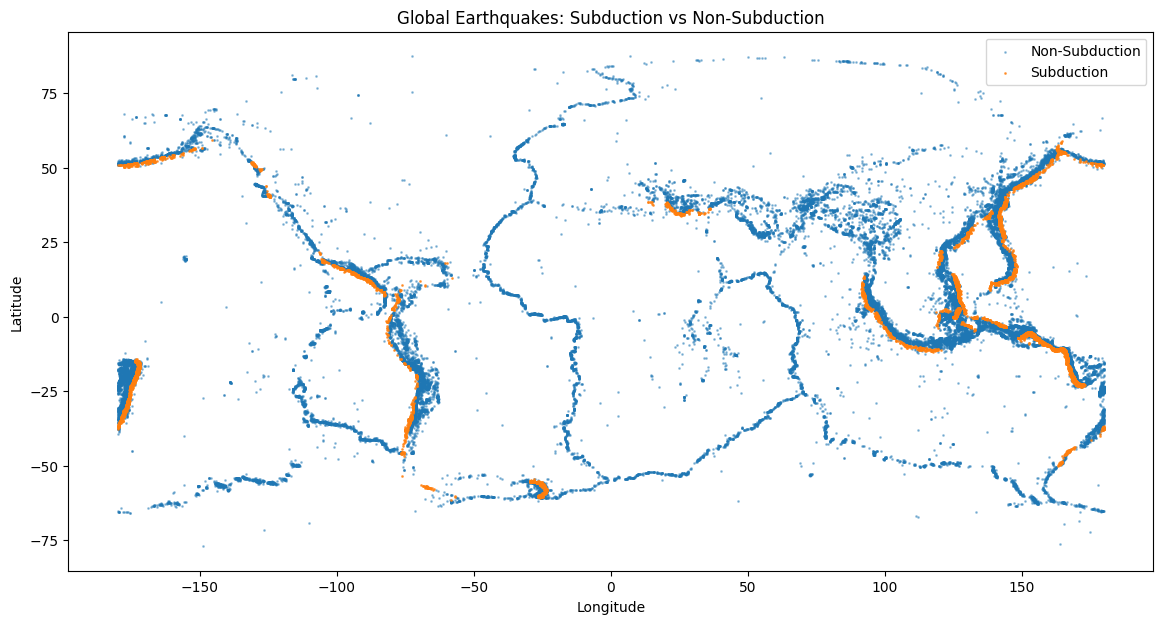

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

# Subduction
df_subduction = df[df['subduction_flag'] == 1]
# Non-subduction
df_non = df[df['subduction_flag'] == 0]

plt.scatter(df_non['longitude'], df_non['latitude'],
            s=1, label='Non-Subduction', alpha=0.4)

plt.scatter(df_subduction['longitude'], df_subduction['latitude'],
            s=1, label='Subduction', alpha=0.7)

plt.title('Global Earthquakes: Subduction vs Non-Subduction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


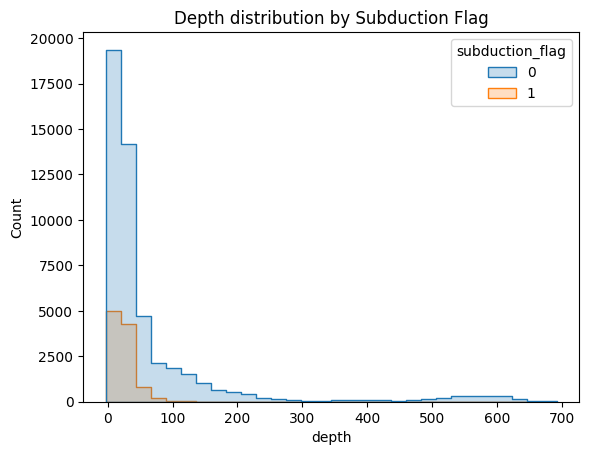

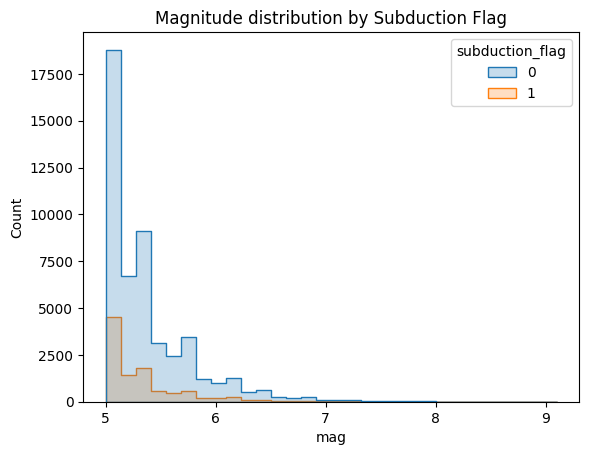

In [5]:
import seaborn as sns

sns.histplot(data=df, x='depth', hue='subduction_flag', element='step', bins=30)
plt.title('Depth distribution by Subduction Flag')
plt.show()

sns.histplot(data=df, x='mag', hue='subduction_flag', element='step', bins=30)
plt.title('Magnitude distribution by Subduction Flag')
plt.show()


In [6]:
print(df.groupby('subduction_flag')['depth'].describe())
print(df.groupby('subduction_flag')['mag'].describe())


                   count       mean         std    min   25%   50%   75%  \
subduction_flag                                                            
0                49345.0  67.018161  115.753991 -3.000  10.0  33.0  58.5   
1                10428.0  26.436130   28.260550 -0.533  10.0  22.5  33.0   

                   max  
subduction_flag         
0                691.6  
1                611.9  
                   count      mean       std  min  25%  50%  75%  max
subduction_flag                                                      
0                49345.0  5.368521  0.418395  5.0  5.1  5.2  5.5  9.1
1                10428.0  5.329437  0.402667  5.0  5.1  5.2  5.5  8.1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

X = df[['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day_of_year']]
y = df['subduction_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.83      1.00      0.90     14804
           1       0.00      0.00      0.00      3128

    accuracy                           0.83     17932
   macro avg       0.41      0.50      0.45     17932
weighted avg       0.68      0.83      0.75     17932

ROC AUC: 0.6790931124925799


c:\Users\Andrei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Andrei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Andrei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

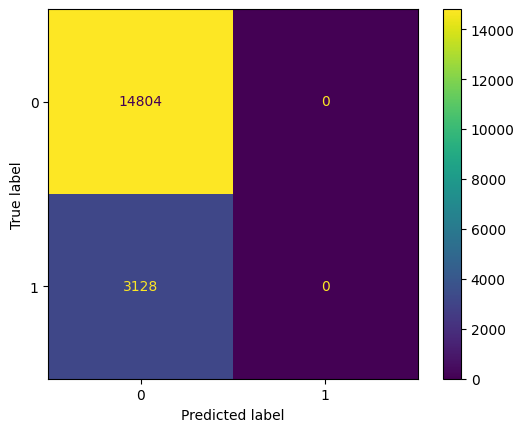

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
